Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

A real-world prediction problem that could benefit from interpretability and decision trees is predicting the likelihood of pedestrian accidents in a given urban area based on various urban data. The model's interpretability is essential to identify the most critical factors that contribute to pedestrian accidents. Understanding the importance of these factors would help urban planners and policymakers implement targeted interventions to reduce pedestrian accidents.


Decision trees are better than random forests in this case because decision trees are simple to understand and visualize and it is easy to see how each input variable contributes to the output.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

A real-world prediction problem using urban data for which accuracy is paramount and interpretability may be less important is predicting the air quality in a city based on various urban data. In this example, interpretability may be less important as long as the model is highly accurate. Random forests might be preferred over decision trees in this case because they often provide better accuracy.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

One way to increase interpretability of a random forest classifier is by clustering the outputs, as suggested [here](https://towardsdatascience.com/representing-a-random-forest-with-few-decision-trees-11283e433dbb). This author suggests that the underlying decision trees within the random forest classifier can form clusters which we can identify and extract to more easily visualize the tree structures.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been modified, so you may get a different tree than the one shown in the lecture notes.  (30 points)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [56]:
# your code here
most_common_mpg = df['MPG'].mode()[0]
print(most_common_mpg)

bad


In [57]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [58]:
#Predicting whether a car is fuel-efficient (MPG is good or bad), given its number of cylinders (4, 6, or 8), weight
#(light, medium, or heavy), and horsepower (real-valued).

disc_vars = [4,6,8,'light', 'medium', 'heavy']
info_gain = []
good_bad_Y = []
good_bad_N = []
split = []

i = 0
for var in disc_vars:
    if i < 3:
        column = 'cylinders'
    if i >= 3:
        column = 'weight'
    split.append(column +' = ' + str(var))
    Y = df[(df[column] == var)]
    N = df[(df[column] != var)]
    good_Y =  len(Y[Y['MPG'] == 'good'])
    bad_Y = len(Y[Y['MPG'] == 'bad'])
    good_N =  len(N[N['MPG'] == 'good'])
    bad_N = len(N[N['MPG'] == 'bad'])
    good_bad_Y.append([good_Y,bad_Y])
    good_bad_N.append([good_N,bad_N])
    #compute IG below
    info_gain.append(InformationGain(good_Y,bad_Y,good_N,bad_N))
    i = i + 1

In [59]:
results = pd.DataFrame(columns = {'Split','Group Y','Group N', 'Gain'})

In [60]:
results['Split'] = split
results['Group Y'] = good_bad_Y
results['Group N'] = good_bad_N
results['Gain'] = info_gain

In [67]:
results.sort_values(by = 'Gain', ascending = False)

,Gain,Group Y,Split,Group N
0,0.468058,"[6, 3]",cylinders = 4,"[0, 11]"
1,0.191631,"[0, 6]",cylinders = 6,"[6, 8]"
3,0.191631,"[4, 2]",weight = light,"[2, 12]"
2,0.153078,"[0, 5]",cylinders = 8,"[6, 9]"
4,0.005802,"[2, 6]",weight = medium,"[4, 8]"
5,0.000000,"[0, 0]",weight = heavy,"[6, 14]"


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [62]:
# your code here
HP_sorted = df.HP.sort_values().to_list()
HP_midpnts = []

for i in range(len(HP_sorted)-1):
    HP_midpnts.append(HP_sorted[i]+(HP_sorted[i+1]-HP_sorted[i])/2)

In [63]:
info_gain = []
good_bad_Y = []
good_bad_N = []
split = []
for midpnt in HP_midpnts:
    Y = df[(df['HP'] > midpnt)]
    N = df[(df['HP'] <= midpnt)]

    good_Y =  len(Y[Y['MPG'] == 'good'])
    bad_Y = len(Y[Y['MPG'] == 'bad'])
    good_N =  len(N[N['MPG'] == 'good'])
    bad_N = len(N[N['MPG'] == 'bad'])
    
    split.append('HP > '+str(midpnt))
    good_bad_Y.append([good_Y,bad_Y])
    good_bad_N.append([good_N,bad_N])
    #compute IG below
    info_gain.append(InformationGain(good_Y,bad_Y,good_N,bad_N))

In [64]:
results2 = pd.DataFrame(columns = {'Split','Group Y','Group N', 'Gain'})
results2['Split'] = split
results2['Group Y'] = good_bad_Y
results2['Group N'] = good_bad_N
results2['Gain'] = info_gain

In [66]:
results2.sort_values(by = 'Gain', ascending = False)

,Gain,Group Y,Split,Group N
7,0.556780,"[0, 12]",HP > 93.5,"[6, 2]"
8,0.468058,"[0, 11]",HP > 94.5,"[6, 3]"
6,0.324890,"[1, 12]",HP > 92.5,"[5, 2]"
2,0.309840,"[3, 14]",HP > 83.0,"[3, 0]"
9,0.281291,"[0, 8]",HP > 95.0,"[6, 6]"
10,0.281291,"[0, 8]",HP > 95.0,"[6, 6]"
11,0.281291,"[0, 8]",HP > 97.5,"[6, 6]"
4,0.275927,"[2, 13]",HP > 89.5,"[4, 1]"
1,0.193507,"[4, 14]",HP > 78.0,"[2, 0]"
5,0.191631,"[2, 12]",HP > 91.0,"[4, 2]"


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Based on the results, the optimal binary split is HP > 93.5 because it has the largest information gain. This split creates a child node (Group N) that has six good and two bad MPG cars that needs further partitioning.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [69]:
info_gain = []
good_bad_Y = []
good_bad_N = []
split = []

Y = df[(df['HP'] > 93.5)]
N = df[(df['HP'] <= 93.5)]

good_Y =  len(Y[Y['MPG'] == 'good'])
bad_Y = len(Y[Y['MPG'] == 'bad'])
good_N =  len(N[N['MPG'] == 'good'])
bad_N = len(N[N['MPG'] == 'bad'])

if good_N == 0 or bad_N == 0:
    print('All groups classified')
else:
    NY = N[N['cylinders'] == 4]
    NN = N[N['cylinders'] != 4]
    
    good_Y =  len(NY[NY['MPG'] == 'good'])
    bad_Y = len(NY[NY['MPG'] == 'bad'])
    good_N =  len(NN[NN['MPG'] == 'good'])
    bad_N = len(NN[NN['MPG'] == 'bad'])
    
    print([good_Y,bad_Y])
    print([good_N,bad_N])

[6, 0]
[0, 2]


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Question 1: HP > 93.5?

Yes > 0 good MPG vehicle, 12 bad MPG vehicles : DONE

No > 6 good MPG vehicle, 2 bad MPG vehicles : CONTINUE

Question 2: Cylinders = 4?

Yes > 6 good MPG vehicle, 0 bad MPG vehicles : DONE

No > 0 good MPG vehicle, 2 bad MPG vehicles : DONE

COMPLETE

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

MPG,cylinders,HP,weight

???,4,93,light > GOOD

???,6,113,medium > BAD

???,4,83,weighty > GOOD

???,6,70,weighty > BAD


### Question 3, Predicting burden of disease （40 pts)

In [94]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier


# remove records with any missing values
data=data.dropna()

# Let's take "found.weapon" as the target variable. 
y=data.loc[:,"BurdenOfDisease"]

# Get the feature space, excludes country name
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
#X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [113]:
#choose max leaf nodes
OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

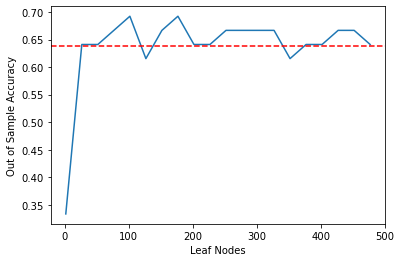

In [114]:
plt.plot(range(2,500,25),OS)
plt.axhline(np.mean(OS),color = 'r',linestyle = '--')
plt.xlabel('Leaf Nodes')
plt.ylabel('Out of Sample Accuracy')
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [130]:
from sklearn.model_selection import GridSearchCV
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_leaf_nodes':range(2,500,25)}
OS=[]

for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid,cv=5)
    rs=gr.fit(X_train,y_train)
    OS.append(rs.score(X_test,y_test))
print(np.mean(OS))

0.6025641025641026


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10 pts)

In [132]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=["low", "medium", "high", "awful"],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="GDPPCptaIntDol <= 2978.5, samples = 91, value = [21, 23, 24, 23], class = high", fillcolor="#fcfeff"] ;
1 [label="SustAccImprSanRur <= 0.416, samples = 36, value = [20, 15, 0, 1], class = low", fillcolor="#f9e1d0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 27, value = [20, 7, 0, 0], class = low", fillcolor="#eead7e"] ;
1 -> 2 ;
3 [label="samples = 9, value = [0, 8, 0, 1], class = medium", fillcolor="#5ee852"] ;
1 -> 3 ;
4 [label="FemaleLtrcyRate <= 0.938, samples = 55, value = [1, 8, 24, 22], class = high", fillcolor="#f3f9fd"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 33, value = [1, 8, 4, 20], class = awful", fillcolor="#eca0f3"] ;
4 -> 5 ;
6 [label="samples = 22, value = [0, 0, 20, 2], class = high", fillcolor="#4da7e8"] ;
4 -> 6 ;
}


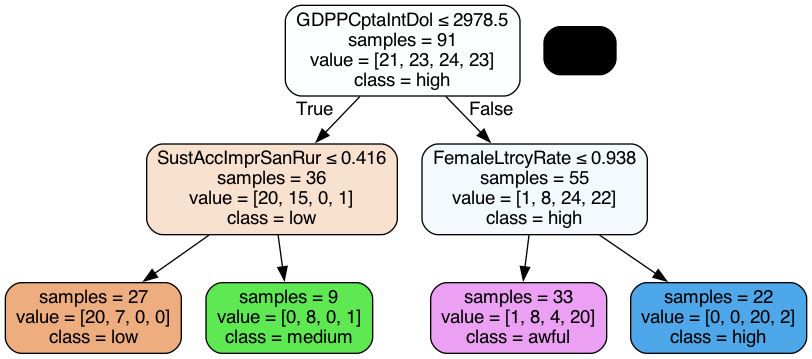

In [136]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=["low", "medium", "high", "awful"],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [135]:
# same training data as above
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
rf.score(X_test,y_test)

0.717948717948718

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

The decision tree model has an average out of sample accuracy of 0.60 while the random forest classifier has an out of sample accuracy of 0.72. While the random forest is about $+10\%$ more accurate than the decision tree, we have no idea what questions are being asked to reach a conclusion. The decision tree has a clear structure we can use to determine the burden of disease.